In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Extração csv

In [4]:
from mlex import PastFutureSplit
path = "/data/pcpe_01.csv"
obj = PastFutureSplit()
df = obj.csv_extraction(path=path)
df

2024-05-31 17:21:57.621135: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,NUMERO_CASO,NUMERO_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,CPF_CNPJ_TITULAR,CNAB,CNAB=101,CNAB=119,CNAB=120,...,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,I-a,I-b,I-c,I-d,I-e,DIA_LANCAMENTO,MES_LANCAMENTO,ANO_LANCAMENTO
0,CASO-01-L1K4U4,O6Y,1965,153602,2,ZS9104223348,218,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017
1,CASO-01-L1K4U4,O6Y,1965,153602,2,ZS9104223348,218,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017
2,CASO-01-L1K4U4,L6X,742,810886,2,RJ3341718546,211,0,0,0,...,75,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
3,CASO-01-L1K4U4,L6X,742,810886,2,RJ3341718546,211,0,0,0,...,75,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
4,CASO-01-L1K4U4,W5Y,554,902093,1,IK6356601049,201,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138300,CASO-01-L1K4U4,O9A,490,296083,1,KO2307484082,206,0,0,0,...,490,296083.0,NaN,NaN,NaN,NaN,NaN,1,3,2021
138301,CASO-01-L1K4U4,O9A,490,296083,1,KO2307484082,102,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2021
138302,CASO-01-L1K4U4,O9A,490,296083,2,KO2307484082,102,0,0,0,...,490,296083.0,NaN,NaN,NaN,NaN,NaN,1,3,2021
138303,CASO-01-L1K4U4,O6Y,5776,191834,1,KO2307484082,205,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2021


# columns

In [5]:
columns_num = [
    'DIA_LANCAMENTO', 
    'MES_LANCAMENTO',
    'VALOR_TRANSACAO',
    'VALOR_SALDO',
]

columns_cat = [
    'TIPO',
    'CNAB',
    'NATUREZA_SALDO'
]

target = ['I-d']
y = df[target].values
y = np.nan_to_num(y)
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [6]:
from mlex import CompositeTranformer
tranformer = CompositeTranformer(
    numeric_features=columns_num,
    categorical_features=columns_cat
)
Xt = tranformer.transform(df)
print(Xt.shape)
print(df.shape)

(138305, 45)
(138305, 47)


# Data_Split

In [45]:
from mlex.utils.splits import PastFutureSplit

split = PastFutureSplit()

X_train, X_test, y_train, y_test = split.train_test_split(Xt,y)

In [60]:
from mlex import SequenceTransfomer
p = SequenceTransfomer()
X_train = np.array(X_train)
y_train = np.array(y_train)
data_train = p.transform(
    X = X_train,
    y = y_train
)

X_test = np.array(X_test)
y_test = np.array(y_test)
data_test = p.transform(
    X = X_test,
    y = y_test
)

In [9]:
import keras
import keras.optimizers.adam

# Model

In [10]:
from mlex.pipelines.simple_pipeline import SimplePipeline
from mlex import SimpleRNNModel
my_model = SimpleRNNModel(input_shape=Xt.shape)
my_model.get_model()

In [11]:
my_model.compile()

In [12]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 138305, 16)        992       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


# Fitting

In [13]:
history = my_model.fit(data_train)

Epoch 1/10


2024-05-31 17:22:19.634870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [69143]
	 [[{{node Placeholder/_8}}]]
2024-05-31 17:22:19.635573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [69143]
	 [[{{node Placeholder/_28}}]]
2024-05-31 17:22:20.974128: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x5bc55e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-31 17:22:20.974178: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce

541/541 [==============================] - 10s 15ms/step - loss: 0.2854 - acc: 0.8911 - auc: 0.8017
Epoch 2/10
541/541 [==============================] - 8s 15ms/step - loss: 0.2471 - acc: 0.8992 - auc: 0.8687
Epoch 3/10
541/541 [==============================] - 8s 15ms/step - loss: 0.2388 - acc: 0.9027 - auc: 0.8799
Epoch 4/10
541/541 [==============================] - 8s 15ms/step - loss: 0.2342 - acc: 0.9053 - auc: 0.8864
Epoch 5/10
541/541 [==============================] - 8s 15ms/step - loss: 0.2303 - acc: 0.9074 - auc: 0.8909
Epoch 6/10
541/541 [==============================] - 8s 15ms/step - loss: 0.2262 - acc: 0.9087 - auc: 0.8943
Epoch 7/10
541/541 [==============================] - 8s 15ms/step - loss: 0.2228 - acc: 0.9103 - auc: 0.8966
Epoch 8/10
541/541 [==============================] - 8s 14ms/step - loss: 0.2200 - acc: 0.9117 - auc: 0.8989
Epoch 9/10
541/541 [==============================] - 8s 15ms/step - loss: 0.2171 - acc: 0.9125 - auc: 0.9015
Epoch 10/10
541/541 

# Predicting

In [40]:
y_pred = my_model.predict(data_test)

541/541 [==============================] - 2s 4ms/step


In [44]:
len(y_pred)

69143

In [ ]:
np.quantile(y_pred, 0.95)

0.5171145081520077

In [ ]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test[:69143], y_pred)


# Metrics

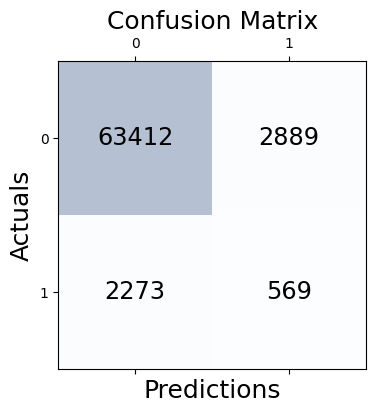

In [ ]:
from sklearn.metrics import confusion_matrix

sequence_length = 5     # PORQUE SÓ PEGA COM 5???

conf_matrix = confusion_matrix(y_true=y_test[sequence_length:-sequence_length+1], y_pred=y_pred > np.quantile(y_pred, 0.95))
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig('../results/confusion_matrix.pdf')
plt.show()

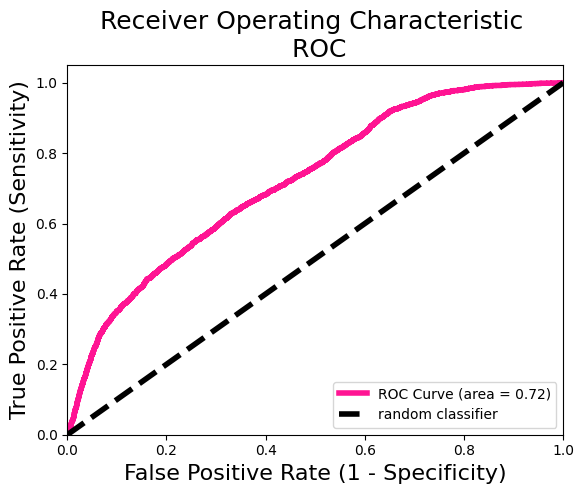

In [ ]:
from sklearn import metrics
title = "ROC"
fpr, tpr, thresholds = metrics.roc_curve(y_test[sequence_length:-sequence_length+1], y_pred)
auc = metrics.auc(fpr, tpr)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='deeppink', linewidth=4, label=f"ROC Curve (area = {round(auc,2) })")
ax.plot([0,1], [0,1], "k--",linewidth=4, label='random classifier')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate (1 - Specificity)", fontsize=16)
ax.set_ylabel("True Positive Rate (Sensitivity)", fontsize=16)
ax.set_title(f"Receiver Operating Characteristic \n {title}", fontsize=18)
ax.legend(loc="lower right")
plt.savefig("../results/roc.pdf")
plt.show()

2024-05-17 15:16:03.821948: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 15:16:05.812820: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-05-17 15:16:05.812857: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: a1c211f74e0b
2024-05-17 15:16:05.812863: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: a1c211f74e0b
2024-05-17 15:16:05.812999: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-05-17 15:16:05.813021: I

Epoch 1/10


2024-05-17 15:16:06.159191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-05-17 15:16:06.159594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [69143]
	 [[{{node Placeholder/_8}}]]


541/541 [==============================] - 3s 3ms/step - loss: 0.3251 - acc: 0.8861 - auc: 0.7052
Epoch 2/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2681 - acc: 0.8943 - auc: 0.8351
Epoch 3/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2500 - acc: 0.9026 - auc: 0.8608
Epoch 4/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2379 - acc: 0.9070 - auc: 0.8771
Epoch 5/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2289 - acc: 0.9103 - auc: 0.8878
Epoch 6/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2226 - acc: 0.9130 - auc: 0.8949
Epoch 7/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2180 - acc: 0.9146 - auc: 0.9001
Epoch 8/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2149 - acc: 0.9154 - auc: 0.9037
Epoch 9/10
541/541 [==============================] - 2s 3ms/step - loss: 0.2123 - acc: 0.9157 - auc: 0.9064
Epoch 10/10
  1/541 [.........

2024-05-17 15:16:23.887354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [69152,1]
	 [[{{node Placeholder/_20}}]]
2024-05-17 15:16:23.887772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [69143]
	 [[{{node Placeholder/_28}}]]


541/541 [==============================] - 2s 3ms/step


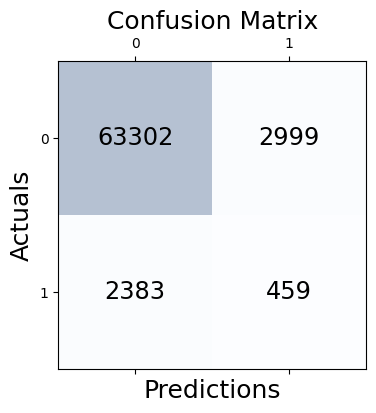

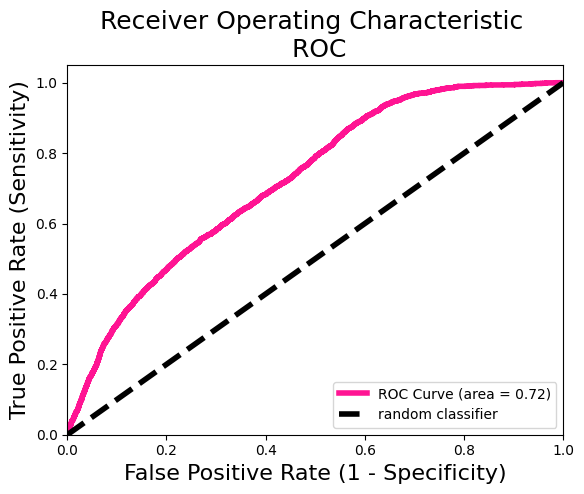

SimplePipeline(categorical_features=['TIPO', 'CNAB', 'NATUREZA_SALDO'],
               df=           NUMERO_CASO NUMERO_BANCO  NUMERO_AGENCIA  NUMERO_CONTA  TIPO  \
0       CASO-01-L1K4U4          O6Y            1965        153602     2   
1       CASO-01-L1K4U4          O6Y            1965        153602     2   
2       CASO-01-L1K4U4          L6X             742        810886     2   
3       CASO-01-L1K4U4          L6X             742        810886     2   
4       CASO-01-L1K4U4          W5Y             554        902093     1   
...                ...          ...             ...           ...   ...   
138300  CASO-01-L1K4U4          O9A             490        296083     1   
138301  CASO-01-L1K4U4          O9A             490        29608...
138303                  0              NaN  NaN  NaN  NaN  NaN  NaN   
138304                  0              NaN  NaN  NaN  NaN  NaN  NaN   

        DIA_LANCAMENTO  MES_LANCAMENTO  ANO_LANCAMENTO  
0                    1               1            2017  
1                    1               1            2017  
2                    2               1            2017  
3                    2               1            2017  
4                    2               1            2017  
...                ...             ...             ...  
138300               1               3            2021  
138301               1               3            2021  
138302               1               3            2021  
138303               1               3            2021  
138304               1               3            2021  

[138305 rows x 47 columns],
               numeric_features=['DIA_LANCAMENTO', 'MES_LANCAMENTO',
                                 'VALOR_TRANSACAO', 'VALOR_SALDO'],
               y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]))

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np

from mlex import PastFutureSplit
from mlex import SimplePipeline
    

path = "/data/pcpe_01.csv"
obj = PastFutureSplit()
df = obj.csv_extraction(path=path)

columns_num = [
    'DIA_LANCAMENTO', 
    'MES_LANCAMENTO',
    'VALOR_TRANSACAO',
    'VALOR_SALDO',
]

columns_cat = [
    'TIPO',
    'CNAB',
    'NATUREZA_SALDO'
]
        
target = ['I-d']
y = df[target].values
y = np.nan_to_num(y)


pipe = SimplePipeline(
    numeric_features = columns_num, 
    categorical_features = columns_cat,
    df = df,
    y = y,
)

pipe
        
        